In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import weather_routing
import pandas
import math

In [3]:
year = 2024
##################
min_lat = 21.1
max_lat = 34.1
max_lng = -118
min_lng = -158
# Waypoints for the TransPac 
waypoints = pandas.DataFrame([
    (33.69853, -118.25085, 'Pt. Fermin Bouy'),
    (33.48177, -118.64101, 'Catalina West End'),
    #(21.24296, -157.81775, 'Diamond Head Bouy'),
            ], columns=['lat', 'lng', 'name'])
# July 1st, 12:00 PST
Start_Date = f"{year}0701"
Start_Time = 19 #19:00 UTC
##################
#grib_files_dir = "historical_gribs/2024"
wind_data_dir = f"historical_wind_data/{year}"

In [4]:
waypoints

,lat,lng,name
0,33.69853,-118.25085,Pt. Fermin Bouy
1,33.48177,-118.64101,Catalina West End


In [ ]:
# rhumb_route, all_routes = weather_routing.route_all_paths(
#     waypoints, 
#     start_date=Start_Date, 
#     start_time=Start_Time,
#     wind_data_dir=wind_data_dir,
#     gps_bounds=[min_lat,max_lat,max_lng,min_lng],
#     max_deg_deviation_from_rhumb=90
# )

In [ ]:
#len(all_routes)


In [ ]:
#all_routes

In [ ]:
# import plotly.graph_objects as go
# import plotly.express as px

# # Create the figure
# fig = go.Figure()



# fig.add_trace(go.Scattermapbox(
#     lat=rhumb_route['lat'],
#     lon=rhumb_route['lng'],
#     mode='lines',
#     line=dict(color='blue', width=2),
#     hovertext=rhumb_route['date']
# ))
# for route in all_routes:
#     route = pandas.DataFrame(route)
    
#     # Add the first route (red line)
#     fig.add_trace(go.Scattermapbox(
#         lat=route['lat'],
#         lon=route['lng'],
#         mode='lines',
#         line=dict(color='red', width=2),
#         hovertext=route['date']
#     ))



# # Add scatter points for waypoints
# scatter_points = px.scatter_mapbox(waypoints, 
#                                    lat="lat", 
#                                    lon="lng", 
#                                    hover_name="name")
# fig.add_traces(scatter_points.data)

# # Update layout for the map
# fig.update_layout(
#     mapbox_style="open-street-map",
#     mapbox_zoom=9,
#     mapbox_center={"lat": 33.7, "lon": -118.5},
#     margin={"r":0, "t":0, "l":0, "b":0},
#    # width=800,
#     height=600
# )

# # Show the plot
# fig.show()


In [59]:
(FCdate, FCtime,_) = weather_routing.get_grib_time(Start_Date, Start_Time)

In [60]:
rhumb_route, rhumb_route_t = weather_routing.simulate_shortest_path(
        waypoints.iloc[0]['lat'], waypoints.iloc[0]['lng'],
        waypoints.iloc[1]['lat'], waypoints.iloc[1]['lng'],
        simulation_time=0,
        FCdate=FCdate,
        FCtime=FCtime,
        wind_data_dir=wind_data_dir
        )
print(f"Rhumb route takes {rhumb_route_t} steps")

starting time: 20240701 18 2024-07-01 11:00:00-07:00
0: twa=132.2 mag=202.2 dtg=19.8 sog=4.7
1: twa=132.2 mag=206.3 dtg=16.3 sog=4.7
2: twa=135 mag=217.5 dtg=13.0 sog=4.4
3: twa=150 mag=237.7 dtg=10.1 sog=3.5
4: twa=150 mag=299.6 dtg=7.1 sog=3.5
5: twa=165 mag=257.4 dtg=4.2 sog=2.9
6: twa=165 mag=277.5 dtg=1.5 sog=2.9
7: twa=180 mag=250.8 dtg=1.1 sog=2.6
Rhumb route takes 8 steps


In [ ]:
# shore_boundaries=[
#   [ (33.72042, -118.20665), #Long breach, PV
#     (33.7025267, -118.25570833),
#     (33.70421,-118.29362),
#     (33.71349, -118.31815667),
#     (33.73722, -118.40627),
#     (33.77504, -118.42992) ],
#   [ (33.31505, -118.28944), # Catalina 
#     (33.40954, -118.36371),
#     (33.47957, -118.53720),
#     (33.47954, -118.60711),
#     (33.44873, -118.59738)]
# ]

In [ ]:
# import copy
# def take_isochron_step(parent_isochron, simulation_time, FCdate, FCtime, wind_data_dir,
#                       max_deviation_angle=90, max_turn_angle=120, max_chull_segment_len=10):
#     #print(parent_isochron)
#     #return
#     isochron=[]
#     (grib_file_date, grib_file_time, hr_offset) = weather_routing.get_grib_time(FCdate, FCtime, simulation_time)
#     min_dtw = None
#     start_lat = parent_isochron[0][0]['lat']
#     start_lng = parent_isochron[0][0]['lng']
#     ###
#     ###
#     for past_traveled_path in parent_isochron:
#         lat = past_traveled_path[-1]['lat']
#         lng = past_traveled_path[-1]['lng']
#         ###
#         wind_data = weather_routing.load_historical_gfs_forecast(wind_data_dir, grib_file_date, 
#                                                           grib_file_time, hr_offset)
#         (tws, twd) = weather_routing.get_wind_at_location_from_data(wind_data, lat, lng)
#         polars = weather_routing.polar_rhiannon(tws)
#         parent_isochron_routes = weather_routing.get_parent_isochron_routes(parent_isochron,lat,lng)
#         ###
#         boat_mag_history={}
#         for (angle,boat_speed) in polars:
#             for delta_angle in (angle, -1*angle):
#                 boat_mag = (twd+delta_angle)%360
#                 ##
#                 if boat_mag in boat_mag_history: continue
#                 boat_mag_history[boat_mag]=1
#                 ##
#                 dev_angle = weather_routing.calculate_deviation(lat, lng, lat_end, lng_end, boat_mag)
#                 # check if we should prune the path
#                 if dev_angle > max_deviation_angle:
#                     print(f"   mag {boat_mag} deviation={dev_angle} too big")
#                     continue                
#                 if simulation_time > 0: # don't calculate turn angle on step 1
#                     turn_angle =  math.fabs((past_traveled_path[-1]['mag'] - boat_mag + 540) % 360 - 180)
#                     if turn_angle > max_turn_angle:
#                         print(f"    mag {boat_mag} turn_angle={turn_angle} too big ")
#                         continue
#                 ##
#                 (dlat,dlng) = weather_routing.calculate_destination_latlng(lat,lng,boat_speed,boat_mag,time_step_size) # hour
#                 dist_traveled = time_step_size * boat_speed
#                 ##
#                 if weather_routing.does_path_cross_boundary(lat, lng, dlat, dlng, weather_routing.shore_boundaries):
#                     print(f"    mag {boat_mag} crosses land")
#                     continue
#                 if weather_routing.does_path_cross_parent_path(lat,lng, dlat, dlng, parent_isochron_routes):
#                     print(f"    mag {boat_mag} crosses parent route")
#                     continue
#                 # save the path
#                 print(f"mag {boat_mag} ({lat},{lng}) ({dlat},{dlng})")
#                 traveled_path = copy.copy(past_traveled_path)
#                 traveled_path.append({
#                     'lat':dlat,
#                     'lng':dlng,
#                     'mag':boat_mag,
#                     'sog':boat_speed,
#                     'dtw':weather_routing.haversine_distance(dlat,dlng,lat_end,lng_end),
#                     'twa':angle,
#                     'tdt':past_traveled_path[-1]['tdt']+dist_traveled,
#                     'date':weather_routing.FCdatetime_to_localtime(FCdate, FCtime,simulation_time+1),
#                 })
#                 isochron.append(traveled_path)
#     #return isochron
#     ################
#     # find the convex hull to represent the isochron
#     convex_hull = []
#     # find the min_dtw point, accept it
#     convex_hull.append(min(isochron, key=lambda x:x[-1]['dtw']))
#     isochron = [item for item in isochron if item != convex_hull[0]]
#     # Positive side
#     while True:
#         max_xp = None
#         max_ndx = None
#         for ndx,x in enumerate(isochron):
#             xp = weather_routing.ccw_crossprod( (start_lat,start_lng),
#                                 (convex_hull[-1][-1]['lat'],convex_hull[-1][-1]['lat']),
#                                 (x[-1]['lat'],x[-1]['lat']) )
#             if max_xp is None or xp > max_xp:
#                 max_xp = xp
#                 max_ndx = ndx
#         if max_xp <= 0 or max_xp is None: break # no positive point found
#         convex_hull.append( isochron.pop(max_ndx) )
#     # Negative side
#     while True:
#         min_xp = None
#         min_ndx = None
#         for ndx,x in enumerate(isochron):
#             xp = weather_routing.ccw_crossprod( (start_lat,start_lng),
#                                 (convex_hull[0][-1]['lat'],convex_hull[0][-1]['lat']),
#                                 (x[-1]['lat'],x[-1]['lat']) )
#             if min_xp is None or xp < min_xp:
#                 min_xp = xp
#                 min_ndx = ndx
#         if min_xp >= 0 or min_xp is None: break # no negative point found
#         convex_hull.insert(0, isochron.pop(min_ndx) )
    
#     return convex_hull        
            

In [95]:
def plot_isochrons_routes(isochrons, rhumb_route=None, min_route=None):
    import plotly.graph_objects as go
    import plotly.express as px
    # Create the figure
    fig = go.Figure()
    
    
    
    for t,isochron in enumerate(isochrons):
        isochron_lats = []
        isochron_lngs = []
        for route in isochron:
    
            isochron_lats.append(route[-1]['lat'])
            isochron_lngs.append(route[-1]['lng'])
    
            if t>0:
                # # Add the first route (red line)
                fig.add_trace(go.Scattermapbox(
                    lat=[route[-2]['lat'], route[-1]['lat']],
                    lon=[route[-2]['lng'], route[-1]['lng']],
                    mode='lines',
                    line=dict(color='rgba(255, 0, 0, 0.25)', width=2),
                    hovertext=f"{route[-1]['date']}"
                ))
        
        fig.add_trace(go.Scattermapbox(
            lat=isochron_lats,
            lon=isochron_lngs,
            mode='lines',
            line=dict(color='rgba(255, 165, 0, 0.75)', width=2),
            hovertext=f"isochron={t+1}"
        ))
    
    if rhumb_route is not None:
        fig.add_trace(go.Scattermapbox(
            lat=rhumb_route['lat'],
            lon=rhumb_route['lng'],
            mode='lines',
            line=dict(color='blue', width=2),
            hovertext=rhumb_route['date']
        ))
    
    if min_route is not None:
        min_route_dt = pandas.DataFrame(min_route)
        fig.add_trace(go.Scattermapbox(
            lat=min_route_dt['lat'],
            lon=min_route_dt['lng'],
            mode='lines',
            line=dict(color='black', width=2),
            hovertext=min_route_dt['date']
        ))
    
    
    # Add scatter points for waypoints
    scatter_points = px.scatter_mapbox(waypoints, 
                                       lat="lat", 
                                       lon="lng", 
                                       hover_name="name")
    fig.add_traces(scatter_points.data)
    # Add the shore boundary line to the figure
    for shore_boundary in weather_routing.shore_boundaries:
        boundary_lat, boundary_lon = zip(*shore_boundary)
        fig.add_trace(go.Scattermapbox(
            lat=boundary_lat,
            lon=boundary_lon,
            mode='lines',
            line=dict(color='green', width=2),
            #name='Boundary'  # Legend label
        ))
    # Update layout for the map
    fig.update_layout(
        mapbox_style="open-street-map",
        mapbox_zoom=9,
        mapbox_center={"lat": 33.7, "lon": -118.5},
        margin={"r":0, "t":0, "l":0, "b":0},
       # width=800,
        height=600,
        showlegend=False
    )
    # Show the plot
    fig.show()

In [109]:

lat_start = waypoints.iloc[0]['lat']
lng_start = waypoints.iloc[0]['lng']
lat_end = waypoints.iloc[1]['lat']
lng_end = waypoints.iloc[1]['lng']
time_step_size = 1 #hour
isochrons=[[
    [{  #start
        'lat':lat_start,
        'lng':lng_start,
        'date': weather_routing.FCdatetime_to_localtime(FCdate, FCtime,0),
        'dtw' : weather_routing.haversine_distance(lat_start,lng_start,lat_end,lng_end), #Distance to Waypoint
        'tdt' : 0, #total distance travled
    }]
]]

end_simulation_time = 1
###
for simulation_time in range(1,end_simulation_time+1):
    print(f"Calculating simulation_time={simulation_time}")
    isochrons.append( weather_routing.take_isochron_step(isochrons[simulation_time-1], simulation_time-1, FCdate, FCtime, 
                                                         wind_data_dir,lat_start,lng_start,lat_end, lng_end, time_step_size) )


Calculating simulation_time=1
   mag 118.1732808818415 deviation=118.23409440720371 too big
   mag 21.7732808818415 deviation=145.36590559279625 too big
   mag 121.9732808818415 deviation=114.4340944072037 too big
   mag 17.973280881841504 deviation=141.5659055927963 too big
   mag 129.9732808818415 deviation=106.4340944072037 too big
   mag 9.973280881841504 deviation=133.5659055927963 too big
   mag 144.9732808818415 deviation=91.4340944072037 too big
   mag 354.9732808818415 deviation=118.5659055927963 too big
mag 159.9732808818415 (33.69853,-118.25085) (33.60400718499465,-118.20948655499828)
   mag 339.9732808818415 deviation=103.5659055927963 too big
mag 179.9732808818415 (33.69853,-118.25085) (33.599430171631425,-118.25079451630212)
    mag 319.9732808818415 crosses land
mag 189.9732808818415 (33.69853,-118.25085) (33.60633940627002,-118.2703143622098)
    mag 309.9732808818415 crosses land
mag 204.9732808818415 (33.69853,-118.25085) (33.6314881873833,-118.28834792801968)
    mag

In [110]:
for route in isochrons[-1]:
    print(route[-1]['mag'])

202.1732808818415
204.9732808818415
219.9732808818415
264.9732808818415


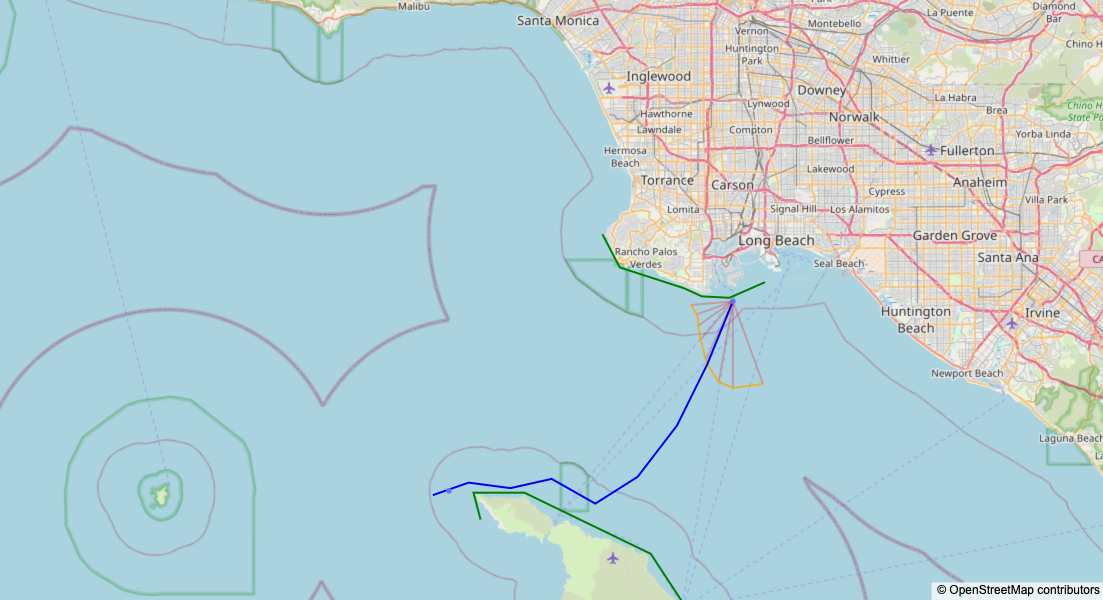

In [99]:
plot_isochrons_routes(isochrons, rhumb_route=rhumb_route)
#plot_isochrons_routes(isochrons)


In [44]:
lat_start

np.float64(33.69853)

In [45]:
lng_start

np.float64(-118.25085)

In [ ]:
len(isochrons)

In [ ]:
for n,i in enumerate(isochrons):
    print(n,len(i))

In [ ]:
#isochrons

In [ ]:
# min_dtg = 30
# min_route = None
# for route in isochrons[5]:
#     #print(route[-1]['dtw'])
#     if route[-1]['dtw'] < min_dtg:
#         min_dtg = route[-1]['dtw']
#         min_route = route
    

In [ ]:
#len(min_route)

In [ ]:
#len(rhumb_route)

In [ ]:
#min_route

In [ ]:
# import math
# def direction_change(mag1, mag2):
#     return math.fabs((mag2 - mag1 + 540) % 360 - 180)

# # Example usage
# mag1 = 270  # Previous direction
# mag2 = 90  # New direction

# change = direction_change(mag1, mag2)
# print(f"Change in direction: {change} degrees")

In [ ]:
# red=[]
# blue=[]


# red.append([(33.68363, -118.29993),(33.60323, -118.24198)])
# blue.append([(33.69853,-118.25085),(33.59943,-118.25079)])
# red.append([(33.68363, -118.29993),(33.58692, -118.26669)])
# blue.append([(33.69853,-118.25085),(33.63149,-118.28835)])




# # Create the figure
# fig = go.Figure()

# for red_line in red:
#     lats, lngs = zip(*red_line)
#     fig.add_trace(go.Scattermapbox(
#         lat=lats,
#         lon=lngs,
#         mode='lines',
#         line=dict(color='red', width=2),
#     ))

# for blue_line in blue:
#     lats, lngs = zip(*blue_line)
#     fig.add_trace(go.Scattermapbox(
#         lat=lats,
#         lon=lngs,
#         mode='lines',
#         line=dict(color='blue', width=2),
#     ))



# # Update layout for the map
# fig.update_layout(
#     mapbox_style="open-street-map",
#     mapbox_zoom=9,
#     mapbox_center={"lat": 33.7, "lon": -118.5},
#     margin={"r":0, "t":0, "l":0, "b":0},
#    # width=800,
#     height=600
# )
# # Show the plot
# fig.show()

In [ ]:
# def does_path_cross_boundary(lat, lng, dlat, dlng, boundaries):
#     """
#     Check if the path from (lat, lng) to (dlat, dlng) crosses a boundary.

#     Args:
#         lat (float): Current latitude.
#         lng (float): Current longitude.
#         dlat (float): Destination latitude.
#         dlng (float): Destination longitude.
#         boundaries (list of lists of tuples): List of Lists of (latitude, longitude) 
#             pairs defining the boundary.

#     Returns:
#         bool: True if the path crosses the boundary, False otherwise.
#     """
#     def lines_intersect(p1, p2, q1, q2):
#         """Check if two line segments (p1-p2 and q1-q2) intersect."""
#         def orientation(a, b, c):
#             """Find orientation of the triplet (a, b, c)."""
#             val = (b[1] - a[1]) * (c[0] - b[0]) - (b[0] - a[0]) * (c[1] - b[1])
#             #print(f"orientation({a}, {b}, {c}) val={val}")
#             if val == 0:
#                 return 0  # Collinear
#             return 1 if val > 0 else -1  # Clockwise or counterclockwise

#         def on_segment(a, b, c):
#             """Check if point b lies on segment a-c."""
#             return (min(a[0], c[0]) <= b[0] <= max(a[0], c[0]) and
#                     min(a[1], c[1]) <= b[1] <= max(a[1], c[1]))

#         o1 = orientation(p1, p2, q1)
#         o2 = orientation(p1, p2, q2)
#         o3 = orientation(q1, q2, p1)
#         o4 = orientation(q1, q2, p2)

#         #print(f"o1={o1} o2={o2} o3={o3} o4={o4}")

#         # General case
#         if o1 != o2 and o3 != o4:
#             return True

#         # Special cases
#         if o1 == 0 and on_segment(p1, q1, p2): return True
#         if o2 == 0 and on_segment(p1, q2, p2): return True
#         if o3 == 0 and on_segment(q1, p1, q2): return True
#         if o4 == 0 and on_segment(q1, p2, q2): return True

#         return False

#     # Current path as a segment
#     current_path = ((lat, lng), (dlat, dlng))
#     #print(f"current_path={current_path}")

#     # Check intersection with each boundary segment
#     for boundary in boundaries:
#         #print(f"boundary={boundary}")
#         for i in range(len(boundary) - 1):
#             boundary_segment = (boundary[i], boundary[i + 1])
#             #print(f"   boundary_segment={boundary_segment}")
#             if lines_intersect(current_path[0], current_path[1], boundary_segment[0], boundary_segment[1]):
#                 return True

#     return False
 

In [ ]:
# boundaries_test=[
#   [ (33.72042, -118.20665), #Long breach, PV
#    (33.7025267, -118.26670833),
#  ],

# ]
# test_path = [(33.69853,-118.25085),(33.774391489947426,-118.32752588879168)]

# does_path_cross_boundary(test_path[0][0],test_path[0][1],test_path[1][0],test_path[1][1], boundaries_test)

In [ ]:
# # Create the figure
# fig = go.Figure()

# test_path_lat, test_path_lon = zip(*test_path)
    
# # Add the first route (red line)
# fig.add_trace(go.Scattermapbox(
#     lat=test_path_lat,
#     lon=test_path_lon,
#     mode='lines',
#     line=dict(color='red', width=2)
# ))


# # Add the shore boundary line to the figure
# for test_boundary in boundaries_test:
#     boundary_lat, boundary_lon = zip(*test_boundary)
#     fig.add_trace(go.Scattermapbox(
#         lat=boundary_lat,
#         lon=boundary_lon,
#         mode='lines',
#         line=dict(color='green', width=2),
#     ))
# # Update layout for the map
# fig.update_layout(
#     mapbox_style="open-street-map",
#     mapbox_zoom=11,
#     mapbox_center={"lat": 33.71,
#                    "lon": -118.2},
#     margin={"r":0, "t":0, "l":0, "b":0},
#    # width=800,
#     height=600
# )
# # Show the plot
# fig.show()